In [1]:
# Input info
#outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/fate_correlation/scrap/minC5_corr.Kendall.b/"
#se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
se_cells_meta_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var_init/variants.prefilterMerge_impute_knnRes.30/aggregate/annotation/se_cells_meta_labels.tsv"
outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var_init/variants.prefilterMerge_impute_knnRes.30/aggregate/annotation/clone_lineage/collapseLineages/"

use_input = False
min_cell = 5
input_col = "Input"
pseudocount=0

to_group = True

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import colorcet as cc
%matplotlib inline
import numpy as np
from mplh.fig_utils import helper_save as hs

fig_utils from mplh


In [3]:
sns.set(font_scale = 1.3)


In [4]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [5]:
def get_clone_count(x, clone_counts):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]


In [6]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)
se_cells_meta["nuclear_clusters"] = se_cells_meta["nuclear_clusters"].astype(object).astype(str)



### Remove None before normalizing
if use_input:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]

if to_group:
    se_cells_meta["nuclear_clusters"] = se_cells_meta["nuclear_clusters"].apply(lambda x: ''.join(i for i in x if not i.isdigit()))
    
se_cells_meta

,Unnamed: 0,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,...,seurat_clusters,nCount_ATAC_log2,nCount_RNA,nFeature_RNA,Row.names,name,run,donor,condition,nuclear_clusters
0,cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,Flt3l,5219,5219,25798.0,3956,111,95,1643,4740,...,5,12.349834,8908,5567,cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,cd34norm_1_13,cd34norm,cd34norm_1,Flt3l,Neutrophil
1,cd34norm_Flt3l_AAACGAAAGTACAACA-1,Flt3l,1542,1542,12018.0,1524,60,45,585,5688,...,5,10.591522,2356,1996,cd34norm_Flt3l_AAACGAAAGTACAACA-1,cd34norm_0_0,cd34norm,cd34norm_0,Flt3l,Neutrophil
2,cd34norm_Flt3l_AAACGAACAACGTACT-1,Flt3l,3251,3251,37690.0,3034,82,125,1680,24974,...,1,11.667112,4275,3340,cd34norm_Flt3l_AAACGAACAACGTACT-1,cd34norm_2_4,cd34norm,cd34norm_2,Flt3l,HPSC
3,cd34norm_Flt3l_AAACGAACAAGCGGTA-1,Flt3l,1488,1488,9381.0,1416,44,50,547,3616,...,5,10.540128,2150,1864,cd34norm_Flt3l_AAACGAACAAGCGGTA-1,cd34norm_2_2,cd34norm,cd34norm_2,Flt3l,Neutrophil
4,cd34norm_Flt3l_AAACGAACACCTGGTG-1,Flt3l,3107,3107,30421.0,5698,112,157,1762,14034,...,8,11.601771,5338,3881,cd34norm_Flt3l_AAACGAACACCTGGTG-1,cd34norm_2_8,cd34norm,cd34norm_2,Flt3l,MkP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18314,CHIP_b2_Input_TTTGTGTCATGGCCTG-1,Input,2009,2009,8747.0,1284,52,37,278,4416,...,10,10.972980,1969,1714,CHIP_b2_Input_TTTGTGTCATGGCCTG-1,CHIP_b2_1_12,CHIP_b2,CHIP_b2_1,Input,HPSC
18315,CHIP_b2_Input_TTTGTGTGTGGAAAGA-1,Input,6841,6841,35511.0,7946,148,118,1467,14501,...,7,12.740202,8019,5370,CHIP_b2_Input_TTTGTGTGTGGAAAGA-1,CHIP_b2_1_15,CHIP_b2,CHIP_b2_1,Input,HPSC
18316,CHIP_b2_Input_TTTGTGTGTGGACAGT-1,Input,1877,1877,14217.0,2190,42,40,420,8229,...,1,10.874981,1912,1659,CHIP_b2_Input_TTTGTGTGTGGACAGT-1,CHIP_b2_0_8,CHIP_b2,CHIP_b2_0,Input,HPSC
18317,CHIP_b2_Input_TTTGTGTTCAGTACAC-1,Input,3000,3000,15165.0,2707,67,52,475,7195,...,1,11.551228,3143,2556,CHIP_b2_Input_TTTGTGTTCAGTACAC-1,CHIP_b2_1_23,CHIP_b2,CHIP_b2_1,Input,HPSC


In [7]:
palette = sns.color_palette(cc.glasbey, n_colors=len(se_cells_meta["nuclear_clusters"].unique()))
hue_order = se_cells_meta.groupby("nuclear_clusters").size().sort_values()[::-1].index
color_d = {key:val for key, val in zip(hue_order, palette)}



In [14]:
clone_counts = (se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size()+pseudocount).reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index(["name"])
clone_counts_combined


,donor,ncells
name,,
CHIP_b1_0_0,CHIP_b1_0,429
CHIP_b1_1_0,CHIP_b1_1,317
CHIP_b1_0_1,CHIP_b1_0,268
cd34norm_0_0,cd34norm_0,264
CHIP_b2_1_26,CHIP_b2_1,247
...,...,...
CHIP_a1_1_29,CHIP_a1_1,1
CHIP_a1_1_21,CHIP_a1_1,1
CHIP_a1_1_15,CHIP_a1_1,1


In [16]:
clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1, args=(clone_counts,))),axis=1).fillna(0)
clone_counts_df


,donor,ncells,Erythrocyte,Granulocyte,HPSC,MkP,Monocyte,Neutrophil,Non-classical monocyte,Pre-B cell,Unknown,preDC
name,,,,,,,,,,,,
CHIP_b1_0_0,CHIP_b1_0,429,25.0,16.0,301.0,14.0,17.0,24.0,2.0,25.0,0.0,5.0
CHIP_b1_1_0,CHIP_b1_1,317,33.0,13.0,218.0,23.0,3.0,12.0,1.0,4.0,4.0,6.0
CHIP_b1_0_1,CHIP_b1_0,268,19.0,4.0,193.0,12.0,8.0,7.0,0.0,18.0,1.0,6.0
cd34norm_0_0,cd34norm_0,264,0.0,25.0,46.0,31.0,25.0,121.0,7.0,0.0,8.0,1.0
CHIP_b2_1_26,CHIP_b2_1,247,25.0,3.0,180.0,16.0,2.0,8.0,0.0,10.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
CHIP_a1_1_29,CHIP_a1_1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIP_a1_1_21,CHIP_a1_1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIP_a1_1_15,CHIP_a1_1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:


def convert_log2(df):
    log2_df = df.copy()
    log2_df[hue_order] = np.log2(1+log2_df[hue_order])
    return log2_df
     


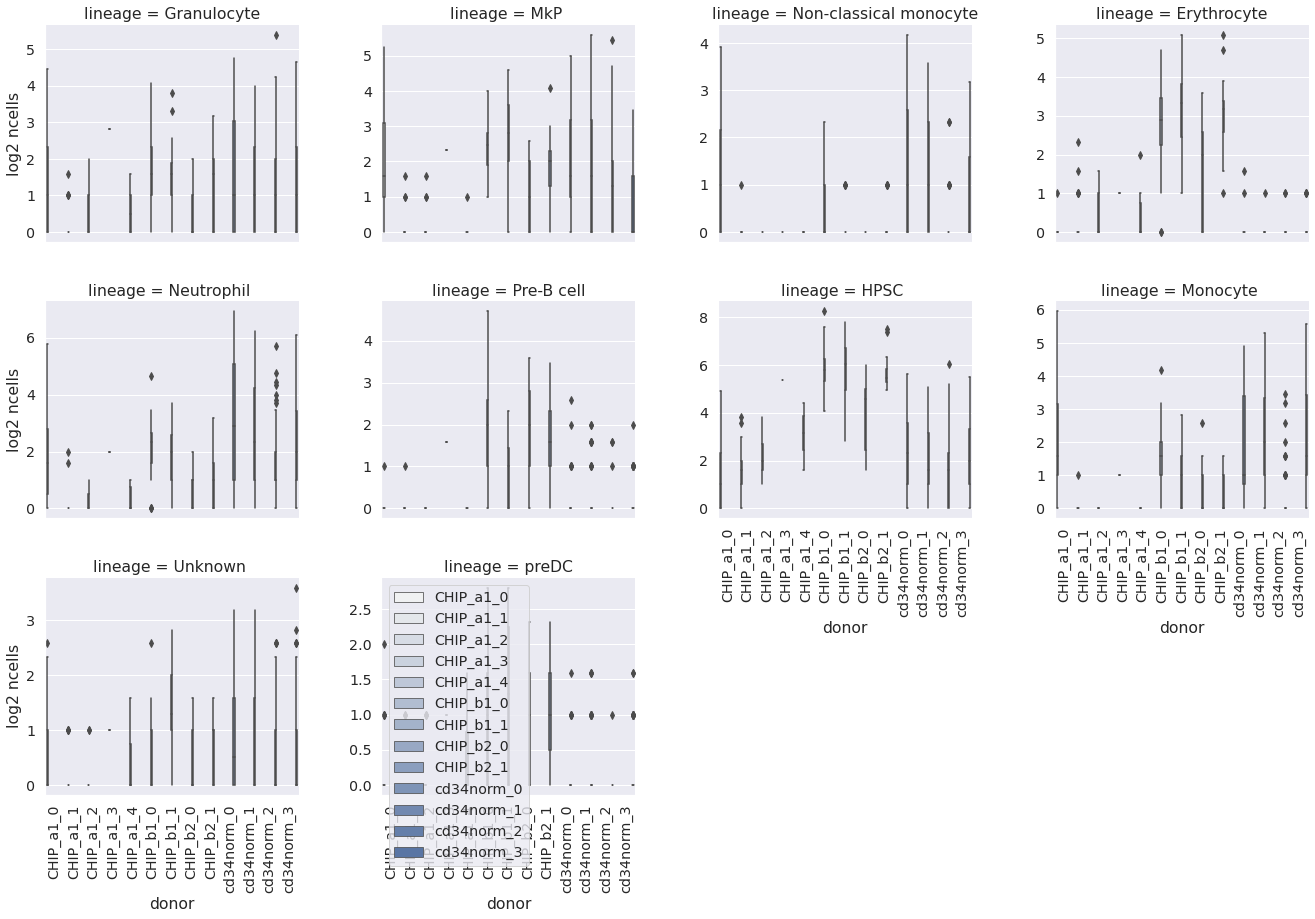

In [47]:
# long_clone_counts_df = clone_counts_df.drop("ncells", axis=1).reset_index().melt(id_vars=["name", "donor"], value_name="ncells", 
#                                    var_name="lineage")
# long_clone_counts_df["log2 ncells"] = np.log2(long_clone_counts_df["ncells"]+1)
# g = sns.FacetGrid(data=long_clone_counts_df, col="lineage", col_wrap=4, sharey=False, height=4, aspect=1)
# g.map_dataframe(sns.violinplot, x="donor", y="log2 ncells" )
# for ax_n in g.axes_dict:
#     ax = g.axes_dict[ax_n]
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    

long_clone_counts_df = clone_counts_df.drop("ncells", axis=1).reset_index().melt(id_vars=["name", "donor"], 
                                                                                           value_name="ncells", var_name="lineage")

long_clone_counts_df = long_clone_counts_df.sort_values("donor")
long_clone_counts_df["log2 ncells"] = np.log2(long_clone_counts_df["ncells"]+1)
g = sns.FacetGrid(data=long_clone_counts_df, col="lineage", col_wrap=4, sharey=False, height=4, aspect=1.2)
g.map_dataframe(sns.boxplot, x="donor", hue="donor", y="log2 ncells" )
for ax_n in g.axes_dict:
    ax = g.axes_dict[ax_n]
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='best')
g.fig.savefig(join(outdir, "condition_lineage_clone_violin_aggregate.pdf"), dpi=300)

---

---

---

In [32]:
def get_cond_clone_count(x, clone_counts):
    curr = clone_counts[(clone_counts["name"]==x.name[0]) & (clone_counts["condition"]==x.name[1])]
    return curr.set_index("nuclear_clusters")["ncells"].fillna(0)



In [22]:
cond_clone_counts = (se_cells_meta.groupby(["name", "nuclear_clusters","donor", "condition"]).size()+pseudocount).reset_index().rename({0:"ncells"}, axis=1)
cond_clone_counts = cond_clone_counts[~(cond_clone_counts["name"]=="None")]
cond_clone_counts_combined = cond_clone_counts.groupby(["name", "donor", "condition"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index(["name", "condition", "donor"])
cond_clone_counts_combined


,,,ncells
name,condition,donor,
CHIP_b1_0_0,Input,CHIP_b1_0,388
CHIP_b1_1_0,Input,CHIP_b1_1,301
cd34norm_0_0,Flt3l,cd34norm_0,264
CHIP_b1_0_1,Input,CHIP_b1_0,255
CHIP_b2_1_26,Input,CHIP_b2_1,247
...,...,...,...
CHIP_a1_2_15,Input,CHIP_a1_2,1
CHIP_b1_1_25,Flt3l,CHIP_b1_1,1
CHIP_b1_1_18,Flt3l,CHIP_b1_1,1


In [33]:


cond_clone_counts_df = pd.concat((cond_clone_counts_combined, 
                                  cond_clone_counts_combined.apply(get_cond_clone_count, axis=1, args=(cond_clone_counts,))),axis=1).fillna(0)

cond_clone_counts_combined



,,,ncells
name,condition,donor,
CHIP_b1_0_0,Input,CHIP_b1_0,388
CHIP_b1_1_0,Input,CHIP_b1_1,301
cd34norm_0_0,Flt3l,cd34norm_0,264
CHIP_b1_0_1,Input,CHIP_b1_0,255
CHIP_b2_1_26,Input,CHIP_b2_1,247
...,...,...,...
CHIP_a1_2_15,Input,CHIP_a1_2,1
CHIP_b1_1_25,Flt3l,CHIP_b1_1,1
CHIP_b1_1_18,Flt3l,CHIP_b1_1,1


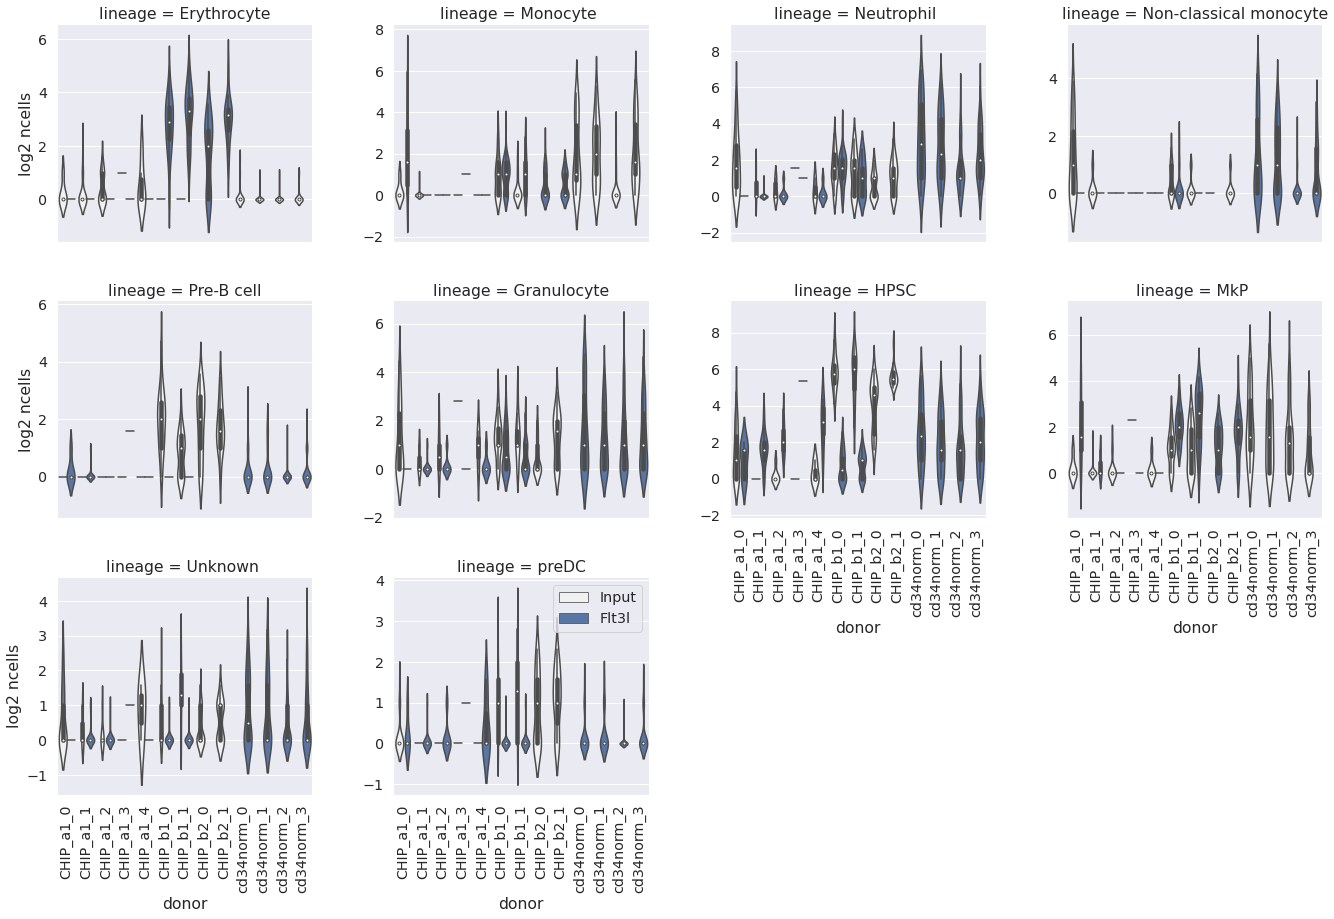

In [44]:

long_cond_clone_counts_df = cond_clone_counts_df.drop("ncells", axis=1).reset_index().melt(id_vars=["name", "donor", "condition"], 
                                                                                           value_name="ncells", var_name="lineage")

long_cond_clone_counts_df = long_cond_clone_counts_df.sort_values("donor")
long_cond_clone_counts_df["log2 ncells"] = np.log2(long_cond_clone_counts_df["ncells"]+1)
g = sns.FacetGrid(data=long_cond_clone_counts_df, col="lineage", col_wrap=4, sharey=False, height=4, aspect=1.2)
g.map_dataframe(sns.violinplot, x="donor", hue="condition", y="log2 ncells" )
for ax_n in g.axes_dict:
    ax = g.axes_dict[ax_n]
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='best')
g.fig.savefig(join(outdir, "condition_lineage_clone_violin_aggregate.pdf"), dpi=300)

In [23]:
outdir

'/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var_init/variants.prefilterMerge_impute_knnRes.30/aggregate/annotation/fate_corr/minC5_corr.Kendall.b_group_inputOnly/'